<a href="https://colab.research.google.com/github/AxithChoudhary/UCI-s-Heart-Disease-Dataset/blob/main/UCI%E2%80%99s_Heart_Disease_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Library 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time

from sklearn import preprocessing  
from sklearn.model_selection import train_test_split,learning_curve,GridSearchCV,ShuffleSplit
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings("ignore")


sns.set(style="whitegrid")

##Reading and Plotting dataset 

In [2]:
data=pd.read_csv("https://mlc-deployment.s3.amazonaws.com/heart.csv")
data.head()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.describe()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   sex                  303 non-null    int64  
 2   chest_pain_type      303 non-null    int64  
 3   resting_bp           303 non-null    int64  
 4   cholestoral          303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   restecg              303 non-null    int64  
 7   max_hr               303 non-null    int64  
 8   exang                303 non-null    int64  
 9   oldpeak              303 non-null    float64
 10  slope                303 non-null    int64  
 11  num_major_vessels    303 non-null    int64  
 12  thal                 303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_bp', 'cholestoral',
       'fasting_blood_sugar', 'restecg', 'max_hr', 'exang', 'oldpeak', 'slope',
       'num_major_vessels', 'thal', 'target'],
      dtype='object')

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'chest_pain_type'}>,
        <AxesSubplot:title={'center':'resting_bp'}>,
        <AxesSubplot:title={'center':'cholestoral'}>],
       [<AxesSubplot:title={'center':'fasting_blood_sugar'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'max_hr'}>,
        <AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>],
       [<AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'num_major_vessels'}>,
        <AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>]],
      dtype=object)

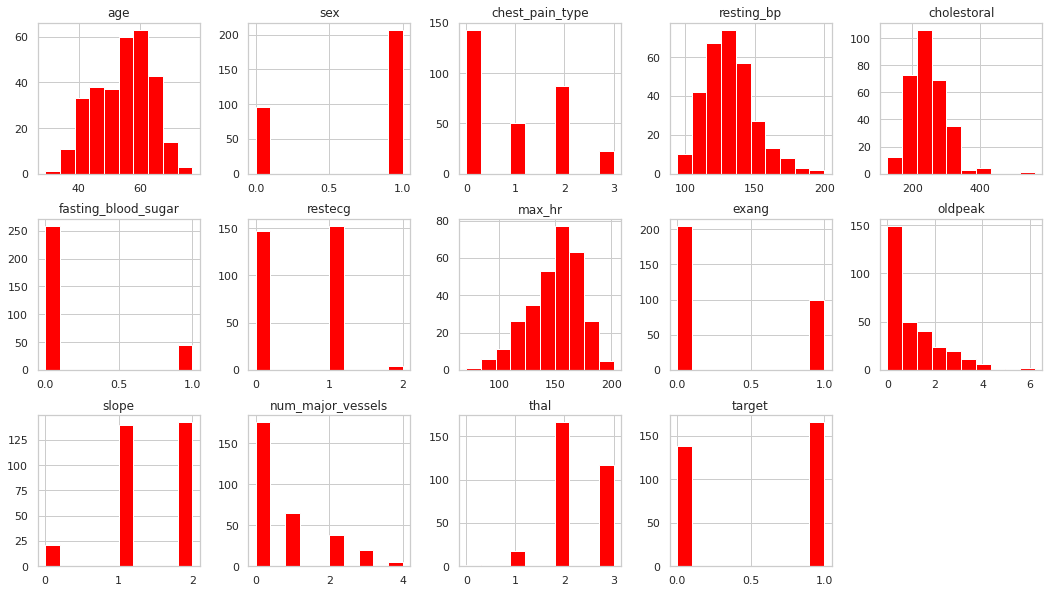

In [6]:
data.hist(layout=(3,5),figsize=(18,10),color="red")

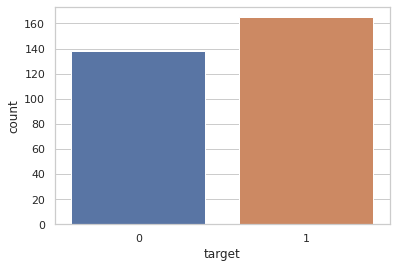

In [7]:
sns.countplot(x="target",data=data)
plt.show()

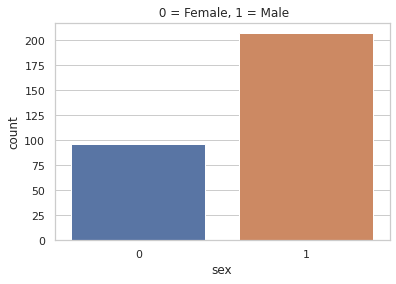

In [8]:
sns.countplot(x="sex",data=data)
plt.title(" 0 = Female, 1 = Male")
plt.show()

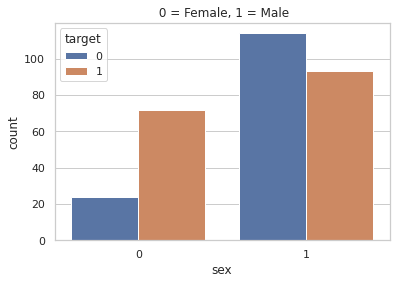

In [9]:
sns.countplot(x="sex",hue="target",data=data)
plt.title(" 0 = Female, 1 = Male")
plt.show()

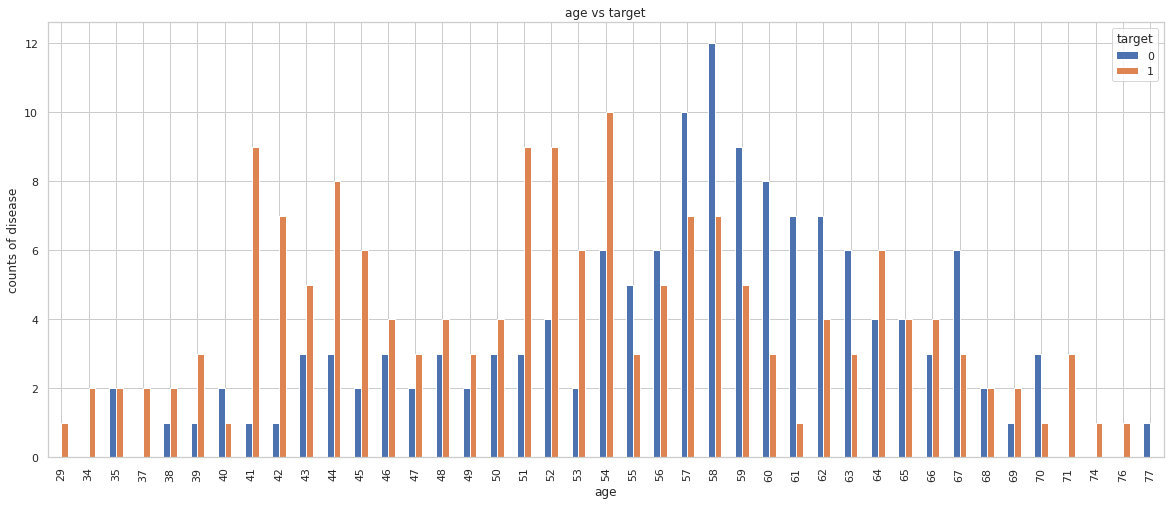

In [10]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,8))
plt.title("age vs target")
plt.ylabel("counts of disease")
plt.show()

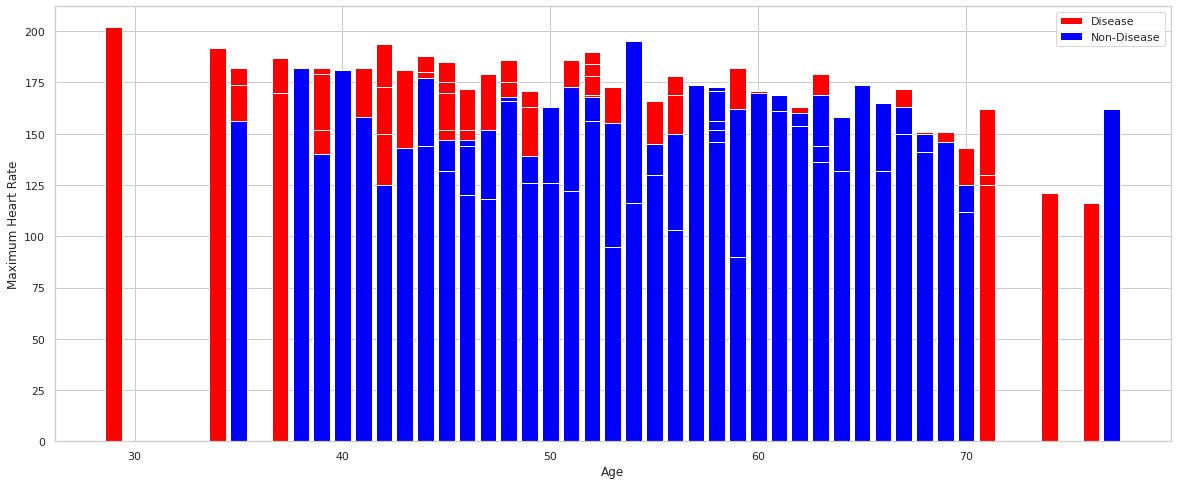

In [11]:
plt.figure(figsize=(20,8))
plt.bar(data.age[data.target==1], data.max_hr[data.target==1],color='red')
plt.bar(data.age[data.target==0], data.max_hr[data.target==0],color='blue')
plt.legend(["Disease","Non-Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

##Data Pre-processing

In [12]:
data.isnull().sum()

age                    0
sex                    0
chest_pain_type        0
resting_bp             0
cholestoral            0
fasting_blood_sugar    0
restecg                0
max_hr                 0
exang                  0
oldpeak                0
slope                  0
num_major_vessels      0
thal                   0
target                 0
dtype: int64

In [13]:
data.duplicated().any()

True

In [14]:
data.drop_duplicates(subset=None,inplace=True)
data.duplicated().any()

False

In [15]:
data.shape

(302, 14)

####One-Hot Encoding

In [16]:
data.head(10)

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [17]:
features_to_encode=['chest_pain_type','slope', 'thal', 'restecg']

for f in features_to_encode:
  if(f in data.columns):
    encoded=pd.get_dummies(data[f])
    encoded=encoded.add_prefix(f + "_")
    data=pd.concat([data,encoded],axis=1)
  else: print("feature not found")
data.drop(columns=features_to_encode,inplace=True)
print(data.shape)


(302, 24)


In [18]:
data.head()

,age,sex,resting_bp,cholestoral,fasting_blood_sugar,max_hr,exang,oldpeak,num_major_vessels,target,...,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3,restecg_0,restecg_1,restecg_2
0,63,1,145,233,1,150,0,2.3,0,1,...,1,0,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,...,1,0,0,0,0,1,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,...,0,0,1,0,0,1,0,1,0,0
3,56,1,120,236,0,178,0,0.8,0,1,...,0,0,1,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,0,1,0,0,1,0,0,1,0


In [19]:
data.columns

Index(['age', 'sex', 'resting_bp', 'cholestoral', 'fasting_blood_sugar',
       'max_hr', 'exang', 'oldpeak', 'num_major_vessels', 'target',
       'chest_pain_type_0', 'chest_pain_type_1', 'chest_pain_type_2',
       'chest_pain_type_3', 'slope_0', 'slope_1', 'slope_2', 'thal_0',
       'thal_1', 'thal_2', 'thal_3', 'restecg_0', 'restecg_1', 'restecg_2'],
      dtype='object')

In [20]:
data.describe()

,age,sex,resting_bp,cholestoral,fasting_blood_sugar,max_hr,exang,oldpeak,num_major_vessels,target,...,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3,restecg_0,restecg_1,restecg_2
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,...,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.00000,302.000000
mean,54.42053,0.682119,131.602649,246.500000,0.149007,149.569536,0.327815,1.043046,0.718543,0.543046,...,0.069536,0.463576,0.466887,0.006623,0.059603,0.546358,0.387417,0.486755,0.50000,0.013245
std,9.04797,0.466426,17.563394,51.753489,0.356686,22.903527,0.470196,1.161452,1.006748,0.498970,...,0.254786,0.499499,0.499730,0.081244,0.237142,0.498673,0.487969,0.500654,0.50083,0.114512
min,29.00000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,48.00000,0.000000,120.000000,211.000000,0.000000,133.250000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,55.50000,1.000000,130.000000,240.500000,0.000000,152.500000,0.000000,0.800000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.50000,0.000000
75%,61.00000,1.000000,140.000000,274.750000,0.000000,166.000000,1.000000,1.600000,1.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,0.000000
max,77.00000,1.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,4.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


age                   -0.221476
sex                   -0.283609
resting_bp            -0.146269
cholestoral           -0.081437
fasting_blood_sugar   -0.026826
max_hr                 0.419955
exang                 -0.435601
oldpeak               -0.429146
num_major_vessels     -0.408992
target                 1.000000
chest_pain_type_0     -0.514626
chest_pain_type_1      0.247649
chest_pain_type_2      0.313696
chest_pain_type_3      0.087959
slope_0               -0.062822
slope_1               -0.360258
slope_2                0.392121
thal_0                -0.007056
thal_1                -0.105986
thal_2                 0.526030
thal_3                -0.484887
restecg_0             -0.157299
restecg_1              0.172827
restecg_2             -0.068156
Name: target, dtype: float64


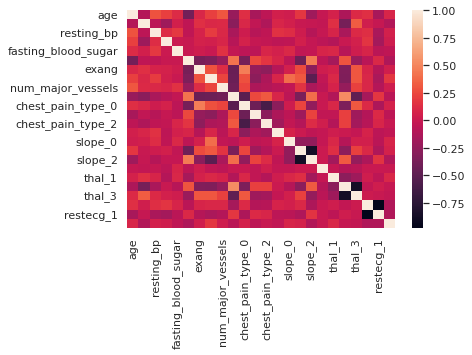

In [21]:
print(data.corr()['target'])
sns.heatmap(data.corr())
plt.show()


###Feature Engineering 

In [22]:
feature_engg_data=data.copy()
outlier_data=data.copy()
target_index=data.columns.get_loc("target")
factor=3

columns_to_include=["age", 'resting_bp', 'cholestoral','max_hr',"num_major_vessels", 'oldpeak']
for columns in columns_to_include:
  upper_lim=feature_engg_data[columns].mean() + feature_engg_data[columns].std()*factor
  lower_lim=feature_engg_data[columns].mean() - feature_engg_data[columns].std()*factor
  feature_engg_data=feature_engg_data[(feature_engg_data[columns]<upper_lim) & (feature_engg_data[columns]>lower_lim)]
outlier_data=pd.concat([outlier_data,feature_engg_data]).drop_duplicates(keep=False)

In [23]:
print(feature_engg_data.shape)
print(outlier_data.shape)

(289, 24)
(13, 24)


###Data Normalization

In [24]:
val=feature_engg_data.values
min_max_normalizer=preprocessing.MinMaxScaler()
norm_val=min_max_normalizer.fit_transform(val)
norm_feature_engg_data=pd.DataFrame(norm_val)

In [25]:
val=outlier_data.values
min_max_norm=preprocessing.MinMaxScaler()
norm_val=min_max_norm.fit_transform(val)
norm_outlier_data=pd.DataFrame(norm_val)

###Test-Train Split

In [26]:
from sklearn.model_selection import train_test_split
input_data=norm_feature_engg_data.drop([target_index],axis='columns')
target=norm_feature_engg_data.filter([target_index],axis='columns')
x,x_test,y,y_test=train_test_split(input_data,target,test_size=0.1,train_size=0.9,random_state=5)
x_train,x_valid,y_train,y_valid=train_test_split(x,y,test_size=0.22,train_size=0.78,random_state=5)


###Buliding model

In [86]:
def ml_model(classifier,classifier_name,**kwargs):
  if kwargs['x_train'] is not None:
    model=classifier.fit(kwargs["x_train"],kwargs["y_train"])
    y_pred_train=model.predict(kwargs["x_train"])
    print("*"*25)
    print("Training Set Performance:")
    print("*"*25)
    accuracy = accuracy_score(kwargs["y_train"],y_pred_train)
    roc_auc=roc_auc_score(kwargs["y_train"],y_pred_train,average="weighted")
    cm=confusion_matrix(kwargs['y_train'], y_pred_train)

    print("Accuracy of",classifier_name,": {:.2f}".format(accuracy))
    print("ROC AUC Score of",classifier_name,": {:.2f}".format(roc_auc))
    print("Confusion Matrix of",classifier_name,": ")

    plt.figure(figsize=(5,5))
    sns.heatmap(cm,annot=True,fmt=".3f",linewidths=.5,square=True,cmap='Blues')
    plt.ylabel("Actual label")
    plt.xlabel("Predicted label")
    title="AUC-ROC Score : {:.2f}".format(roc_auc)
    plt.title(title)
    plt.show()
  if kwargs["x_valid"] is not None:
    y_pred_valid=model.predict(kwargs["x_valid"])
    print("*"*25)
    print("Validation Set Performance")
    print("*"*25)
    accuracy=accuracy_score(kwargs["y_valid"],y_pred_valid)
    roc_auc=roc_auc_score(kwargs["y_valid"],y_pred_valid,average="weighted")
    cm=confusion_matrix(kwargs["y_valid"], y_pred_valid)

    print("Accuracy of",classifier_name,": {:.2f}".format(accuracy))
    print("ROC AUC Score of",classifier_name,": {:.2f}".format(roc_auc))
    print("Confusion Matrix of",classifier_name,": ")

    plt.figure(figsize=(5,5))
    sns.heatmap(cm,annot=True,fmt=".3f",linewidths=.5,square=True,cmap='Blues')
    plt.ylabel("Actual label")
    plt.xlabel("Predicted label")
    title="AUC-ROC Score : {:.2f}".format(roc_auc)
    plt.title(title)
    plt.show()

  if kwargs["x_test"] is not None:
    model=classifier
    start=time.time()
    y_pred_test=model.predict(kwargs["x_test"])
    end=time.time()
    print("*"*25)
    print("Test Set Performance")
    print("*"*25)
    accuracy=accuracy_score(kwargs["y_test"],y_pred_test)
    roc_auc=roc_auc_score(kwargs["y_test"],y_pred_test,average="weighted")
    cm=confusion_matrix(kwargs['y_test'], y_pred_test)

    print("Accuracy of",classifier_name,": {:.2f}".format(accuracy))
    print("ROC AUC Score of",classifier_name,": {:.2f}".format(roc_auc))
    print("Confusion Matrix of",classifier_name,": ")

    plt.figure(figsize=(5,5))
    sns.heatmap(cm,annot=True,fmt=".3f",linewidths=.5,square=True,cmap='Blues')
    plt.ylabel("Actual label")
    plt.xlabel("Predicted label")
    title="AUC-ROC Score : {:.2f}".format(roc_auc)
    plt.title(title)
    plt.show()



In [28]:
def generate_learning_curve(model,model_name,X,y,xlim=None,ylim=None,
                            epochs=None,figsize=(20,5)):
  cross_valid=ShuffleSplit(n_splits=100,test_size=0.2,random_state=0)

  train_sizes=np.linspace(.1,1.0,5)
  train_sizes,train_scores,test_scores,training_time,_ = learning_curve(model,X,y,cv=cross_valid,
                                                                      n_jobs=epochs,train_sizes=train_sizes,
                                                                      return_times=True)
  train_score_mean=np.mean(train_scores,axis=1)
  train_score_std=np.std(train_scores,axis=1)

  test_score_mean=np.mean(test_scores,axis=1)
  test_score_std=np.std(test_scores,axis=1)

  traning_time_mean=np.mean(training_time,axis=1)
  traning_time_std=np.std(training_time,axis=1)

  plt.title(model_name)
  plt.xlabel("Traning examples")
  plt.ylabel("Score")

  plt.fill_between(train_sizes,train_score_mean-train_score_std,
                   train_score_mean+train_score_std,alpha=0.1,
                   color="r")

  plt.fill_between(train_sizes,test_score_mean-test_score_std,
                   test_score_mean+test_score_std,alpha=0.1,
                   color="b")
  
  plt.plot(train_sizes,train_score_mean,"o-",color="r",label="Training scores")
  plt.plot(train_sizes,test_score_mean,"o-",color="b",label="Cross-Validation scores")
  plt.legend(loc="best")
  plt.show()




###Decision Tree

*************************
Training Set Performance:
*************************
Accuracy of Decision Tree : 1.00
ROC AUC Score of Decision Tree : 1.00
Confusion Matrix of Decision Tree : 


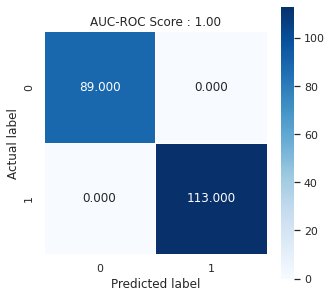

*************************
Validation Set Performance
*************************
Accuracy of Decision Tree : 0.66
ROC AUC Score of Decision Tree : 0.65
Confusion Matrix of Decision Tree : 


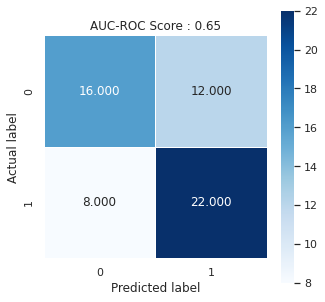

In [62]:
DTC=DecisionTreeClassifier(criterion='entropy',random_state=3)
ml_model(DTC,"Decision Tree",x_train=x_train,
         y_train=y_train,x_valid=x_valid,y_valid=y_valid,x_test=None)

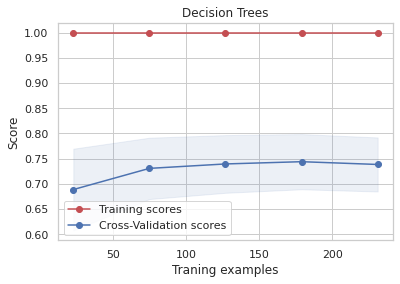

In [63]:
generate_learning_curve(
    model=DTC,
    model_name="Decision Trees",
    X=input_data,
    y=target,
    ylim=(0.7,1.01),
    epochs=5
)

#####Hyper Parameter Turning 

In [65]:
def DTGridSearch(X,y,param_lim):
  param_grid={
      "min_samples_leaf": np.linspace(param_lim[0],param_lim[1],20).astype('int'),
      "max_depth":np.arange(1,param_lim[2]),
      'criterion':['entropy','gini']
  }

  best_DT=GridSearchCV(estimator=DecisionTreeClassifier(random_state=3),param_grid=param_grid,
                       cv=10)
  best_DT.fit(X,y)

  print("Best Decision Tree Hyper-Parameters are:")
  print(best_DT.best_params_)
  
  return best_DT.best_params_['min_samples_leaf'],best_DT.best_params_['max_depth'],best_DT.best_params_['criterion']


In [66]:
min_sample_leaf_lim=int(0.005 * len(x_train))
max_sample_leaf_lim=int(0.1 * len(x_train))
max_depth=10

best_min_sample_leaf, best_max_depth, best_criterion=DTGridSearch(x_train,
                                                                y_train,
                                                                (min_sample_leaf_lim,
                                                                 max_sample_leaf_lim,
                                                                 max_depth))


Best Decision Tree Hyper-Parameters are:
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 12}


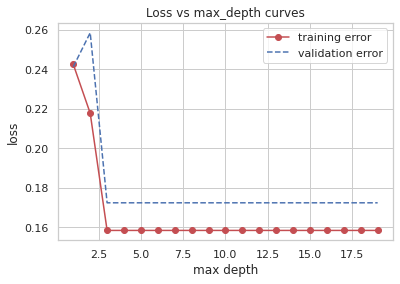

In [67]:
train=[]
valid=[]
for i in range(1,20):
  dec=DecisionTreeClassifier(criterion= 'gini', max_depth= i, min_samples_leaf= 12,random_state=42)
  dec.fit(x_train,y_train)
  train.append(1-accuracy_score(dec.predict(x_train),y_train))
  valid.append(1-accuracy_score(dec.predict(x_valid),y_valid))

plt.title("Loss vs max_depth curves")
depth=[i for i in range(1,20)]
plt.plot(depth,train,"o-",color='r',label="training error")
plt.plot(depth,valid,"--",color='b',label="validation error")
plt.xlabel("max depth")
plt.ylabel('loss')
plt.legend()
plt.show()

*************************
Training Set Performance:
*************************
Accuracy of Decision Tree : 0.84
ROC AUC Score of Decision Tree : 0.84
Confusion Matrix of Decision Tree : 


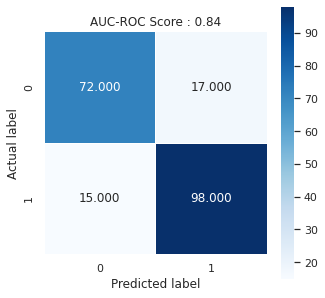

*************************
Validation Set Performance
*************************
Accuracy of Decision Tree : 0.83
ROC AUC Score of Decision Tree : 0.83
Confusion Matrix of Decision Tree : 


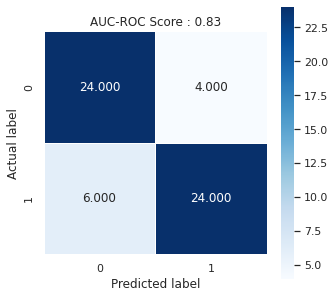

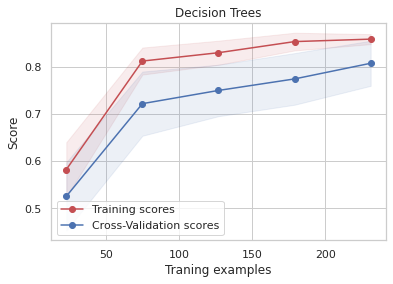

In [68]:
tunedDTC=DecisionTreeClassifier(criterion= 'gini', max_depth= i, min_samples_leaf= 12,random_state=42)
ml_model(tunedDTC,"Decision Tree",x_train=x_train,y_train=y_train,x_valid=x_valid,y_valid=y_valid,x_test=None)

print("\n")
generate_learning_curve(
    model=tunedDTC,
    model_name="Decision Trees",
    X=input_data,
    y=target,
    ylim=(0.7,1.01),
    epochs=5
)

###Neural Network 

*************************
Training Set Performance:
*************************
Accuracy of Neural Network : 0.84
ROC AUC Score of Neural Network : 0.83
Confusion Matrix of Neural Network : 


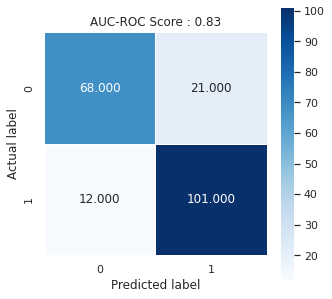

*************************
Validation Set Performance
*************************
Accuracy of Neural Network : 0.81
ROC AUC Score of Neural Network : 0.81
Confusion Matrix of Neural Network : 


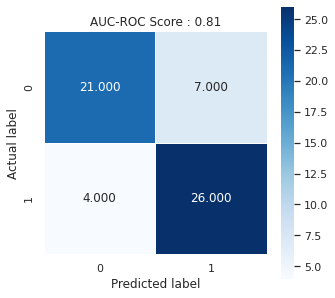

In [69]:


NN=MLPClassifier()
ml_model(NN,"Neural Network",x_train=x_train,y_train=y_train.values.ravel(),x_valid=x_valid,y_valid=y_valid.values.ravel(),x_test=None)

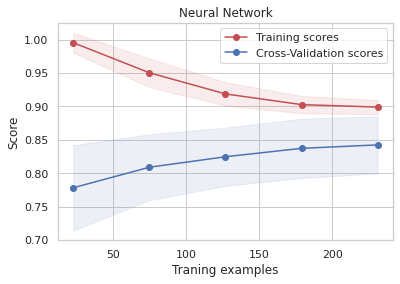

In [70]:
generate_learning_curve(
    model=NN,
    model_name="Neural Network",
    X=input_data,
    y=target,
    ylim=(0.7,1.01),
    epochs=5
)

#####Hyper Parameter Turning 

In [71]:
def NNGridSearch(X,y,param_limits):
  param_grid={
      "hidden_layer_sizes":param_limits[0],
      "activation":param_limits[1],
      "learning_rate_init":param_limits[2],
      "batch_size":param_limits[3],
      "solver":param_limits[4]

  }

  best_nn=GridSearchCV(estimator=MLPClassifier(
                                                max_iter=2000,
                                               early_stopping=True,
                                               random_state=0
                                               ),
                      param_grid=param_grid,
                      cv=10
                       )
  
  best_nn.fit(X,y)

  print("Best Decision Tree Hyper-Parameters are : ")
  print(best_nn.best_params_)

  return best_nn.best_params_['activation'],best_nn.best_params_['hidden_layer_sizes'],best_nn.best_params_['learning_rate_init'],best_nn.best_params_["batch_size"],best_nn.best_params_["solver"]

  

In [74]:
hidden_units=list(range(10,100,10))
activation=['identity', 'logistic', 'tanh', 'relu']
lr=[0.05,0.1,0.01]
batch_size=["auto",16,32,64]
solver=['lbfgs', 'sgd','adam']

best_activation,best_hidden_unit,best_lr,best_batch_size,best_solver=NNGridSearch(x_train,
                                                                                  y_train.values.ravel()
                                                                                  ,(hidden_units,
                                                                                    activation,lr,
                                                                                    batch_size,solver))

Best Decision Tree Hyper-Parameters are : 
{'activation': 'identity', 'batch_size': 32, 'hidden_layer_sizes': 60, 'learning_rate_init': 0.1, 'solver': 'sgd'}

In [75]:
best_activation= 'identity'
best_batch_size=32
best_hidden_unit= 60
best_lr=0.1
best_solver='sgd'

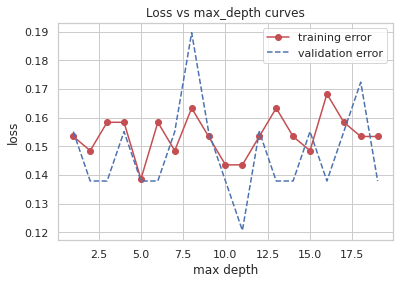

In [76]:
train=[]
valid=[]
for i in range(5,100,5):
  nn=MLPClassifier(hidden_layer_sizes=i,batch_size=best_batch_size,
                   learning_rate_init=best_lr,activation=best_activation,
                   solver=best_solver)
  nn.fit(x_train,y_train)
  train.append(1-accuracy_score(nn.predict(x_train),y_train))
  valid.append(1-accuracy_score(nn.predict(x_valid),y_valid))

plt.title("Loss vs max_depth curves")
depth=[i for i in range(1,20)]
plt.plot(depth,train,"o-",color='r',label="training error")
plt.plot(depth,valid,"--",color='b',label="validation error")
plt.xlabel("max depth")
plt.ylabel('loss')
plt.legend()
plt.show()

*************************
Training Set Performance:
*************************
Accuracy of Neural Network : 0.85
ROC AUC Score of Neural Network : 0.85
Confusion Matrix of Neural Network : 


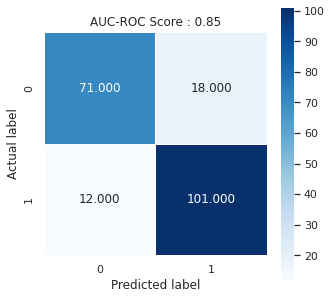

*************************
Validation Set Performance
*************************
Accuracy of Neural Network : 0.88
ROC AUC Score of Neural Network : 0.88
Confusion Matrix of Neural Network : 


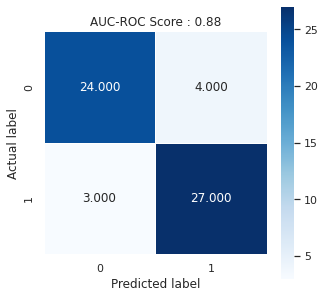

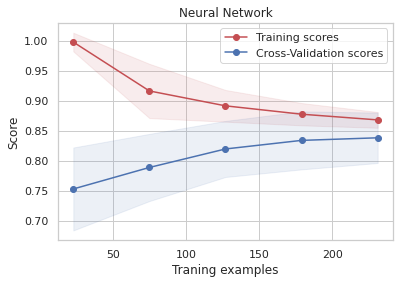

In [77]:
tunedNN=MLPClassifier(activation= 'identity', batch_size= 32, hidden_layer_sizes= 60,
                      learning_rate_init= 0.1, solver= 'sgd',
                      random_state=42)
ml_model(tunedNN,"Neural Network",x_train=x_train,y_train=y_train,
         x_valid=x_valid,y_valid=y_valid,x_test=None)

print("\n")
generate_learning_curve(
    model=tunedNN,
    model_name="Neural Network",
    X=input_data,
    y=target,
    ylim=(0.7,1.01),
    epochs=5
)

###Ada Boosting

*************************
Training Set Performance:
*************************
Accuracy of Ada Boost : 0.95
ROC AUC Score of Ada Boost : 0.94
Confusion Matrix of Ada Boost : 


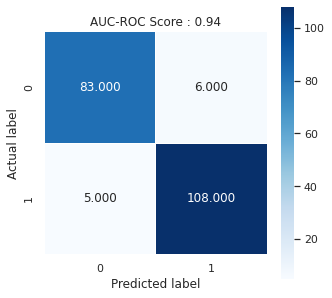

*************************
Validation Set Performance
*************************
Accuracy of Ada Boost : 0.76
ROC AUC Score of Ada Boost : 0.75
Confusion Matrix of Ada Boost : 


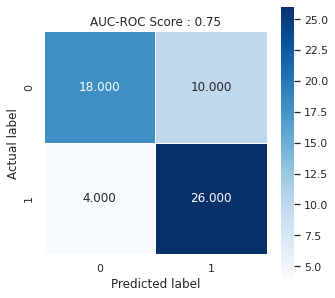

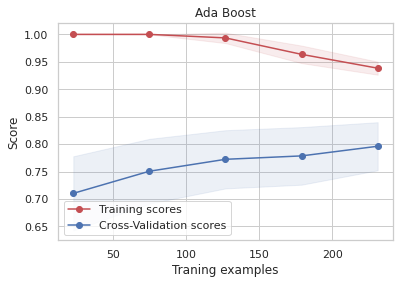

In [78]:
adaBoost=AdaBoostClassifier(random_state=42)
ml_model(adaBoost,"Ada Boost",x_train=x_train,y_train=y_train.values.ravel(),x_valid=x_valid,y_valid=y_valid.values.ravel(),x_test=None)

print("\n")
generate_learning_curve(
    model=adaBoost,
    model_name="Ada Boost",
    X=input_data,
    y=target,
    ylim=(0.7,1.01),
    epochs=5
)


#####Hyper-Parameter Tuning

In [79]:
def adaBoostingGrid(X,y,param_limits):
  param_grid={
      "n_estimators":param_limits[0],
      "learning_rate":param_limits[1],
      "algorithm":param_limits[2]
      }

  best_adb=GridSearchCV(
                          estimator=AdaBoostClassifier(random_state=7),
                          param_grid=param_grid,
                          cv=10
                        )
  
  best_adb.fit(X,y)

  print("Best Decision Tree Hyper=Parameters are:")
  print(best_adb.best_params_)

  return best_adb.best_params_["n_estimators"],best_adb.best_params_["learning_rate"],best_adb.best_params_["algorithm"]

In [80]:
n_estimators = list(range(10,100,10))
learining_rate=[0.05,0.1,0.5,1.0]
algorithm = ["SAMME","SAMME.R"]
best_n_estimators,best_lr,best_algo=adaBoostingGrid(x_train,
                                                    y_train.values.ravel(),
                                                    (n_estimators,learining_rate,algorithm))

Best Decision Tree Hyper=Parameters are:
{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 90}


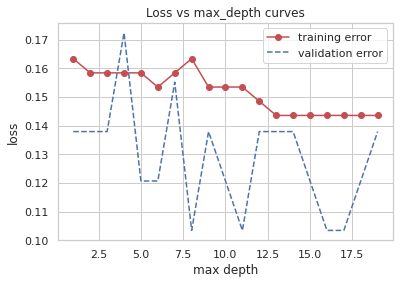

In [81]:
train=[]
valid=[]
for i in range(5,100,5):
  adb=AdaBoostClassifier(n_estimators=i,learning_rate=best_lr,algorithm=best_algo)
  adb.fit(x_train,y_train)
  train.append(1-accuracy_score(adb.predict(x_train),y_train))
  valid.append(1-accuracy_score(adb.predict(x_valid),y_valid))

plt.title("Loss vs max_depth curves")
depth=[i for i in range(1,20)]
plt.plot(depth,train,"o-",color='r',label="training error")
plt.plot(depth,valid,"--",color='b',label="validation error")
plt.xlabel("max depth")
plt.ylabel('loss')
plt.legend()
plt.show()

*************************
Training Set Performance:
*************************
Accuracy of ADA Boosting : 0.86
ROC AUC Score of ADA Boosting : 0.85
Confusion Matrix of ADA Boosting : 


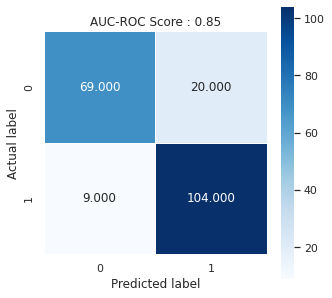

*************************
Validation Set Performance
*************************
Accuracy of ADA Boosting : 0.88
ROC AUC Score of ADA Boosting : 0.88
Confusion Matrix of ADA Boosting : 


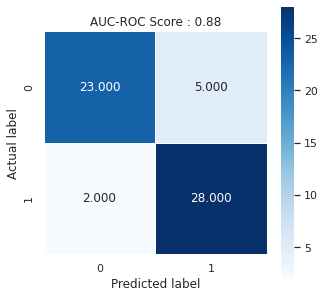

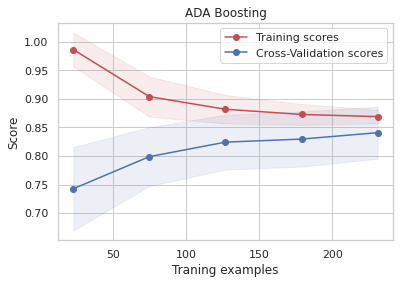

In [82]:
tunedADB=AdaBoostClassifier(n_estimators=90,learning_rate=best_lr,algorithm=best_algo,random_state=40)
ml_model(tunedADB,"ADA Boosting",x_train=x_train,y_train=y_train,
         x_valid=x_valid,y_valid=y_valid,x_test=None)

print("\n")
generate_learning_curve(
    model=tunedADB,
    model_name="ADA Boosting",
    X=input_data,
    y=target,
    ylim=(0.7,1.01),
    epochs=5
)

###Support Vector Machine

*************************
Training Set Performance:
*************************
Accuracy of SVM : 0.88
ROC AUC Score of SVM : 0.87
Confusion Matrix of SVM : 


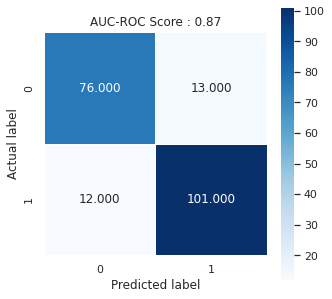

*************************
Validation Set Performance
*************************
Accuracy of SVM : 0.79
ROC AUC Score of SVM : 0.79
Confusion Matrix of SVM : 


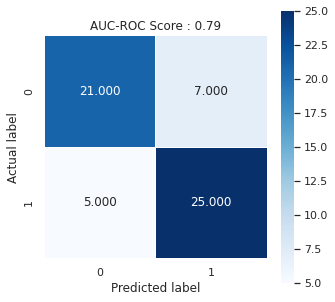

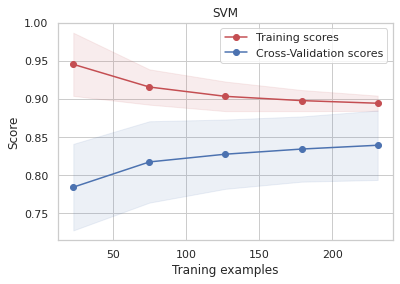

In [37]:
from sklearn import svm
svc=svm.SVC(kernel='rbf',random_state=42)

ml_model(svc,"SVM",x_train=x_train,y_train=y_train.values.ravel(),x_valid=x_valid,
         y_valid=y_valid.values.ravel(),x_test=None)

print("\n")
generate_learning_curve(
    model=svc,
    model_name="SVM",
    X=input_data,
    y=target,
    ylim=(0.7,1.01),
    epochs=5
)

#####hyper-parameter tuning

In [38]:
def SVMGrid(X,y,param_limits):
  param_grid={
      "C":param_limits[0],
      "gamma":param_limits[1],
      "kernel":param_limits[2]
  }

  svc=GridSearchCV(estimator=svm.SVC(random_state=3),
                   param_grid=param_grid,
                   cv=10)
  
  svc.fit(X,y)
  print("Best SVM hyper-parameters are")
  print(svc.best_params_)

  return svc.best_params_["C"],svc.best_params_["gamma"],svc.best_params_["kernel"]

In [39]:
C=[0.0001,0.001,0.01,0.1,1.0,5.0,10.0]
gammas=[1,10,100]
kernel=['linear','poly','rbf','sigmoid']

best_c,best_gamma,best_kernel=SVMGrid(x_train,y_train.values.ravel(),
                                      (C,gammas,kernel))

Best SVM hyper-parameters are
{'C': 0.01, 'gamma': 1, 'kernel': 'linear'}


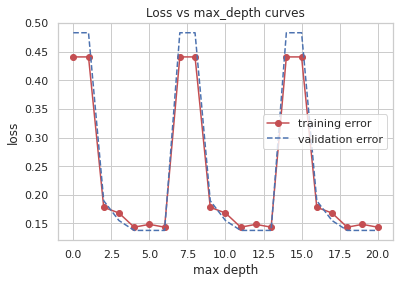

In [51]:
train=[]
valid=[]
best_hyper_params=[]

for g in gammas:
  for c in C:
    svc=svm.SVC(C= c, gamma= g, kernel= 'linear',random_state=42)
    svc.fit(x_train,y_train.values.ravel())
    train.append(1-accuracy_score(svc.predict(x_train),y_train.values.ravel()))
    valid.append(1-accuracy_score(svc.predict(x_valid),y_valid.values.ravel()))
    best_hyper_params.append((c,g))

plt.title("Loss vs max_depth curves")
num_estimators=list(range(len(train)))
plt.plot(num_estimators,train,"o-",color='r',label="training error")
plt.plot(num_estimators,valid,"--",color='b',label="validation error")
plt.xlabel("max depth")
plt.ylabel('loss')
plt.legend()
plt.show()

*************************
Training Set Performance:
*************************
Accuracy of SVM : 0.82
ROC AUC Score of SVM : 0.81
Confusion Matrix of SVM : 


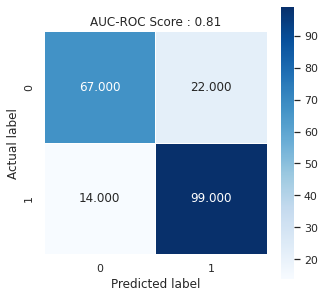

*************************
Validation Set Performance
*************************
Accuracy of SVM : 0.81
ROC AUC Score of SVM : 0.81
Confusion Matrix of SVM : 


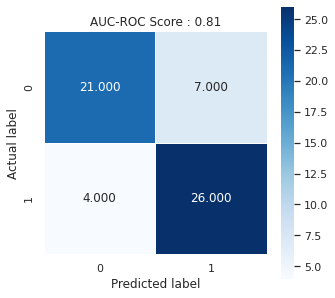

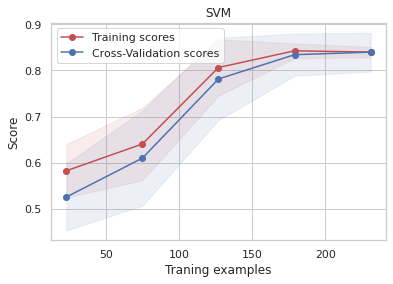

In [52]:
tunedSVM=svm.SVC(C=0.01, gamma= 1, kernel= 'linear',random_state=40)
ml_model(tunedSVM,"SVM",x_train=x_train,y_train=y_train,
         x_valid=x_valid,y_valid=y_valid,x_test=None)

print("\n")
generate_learning_curve(
    model=tunedSVM,
    model_name="SVM",
    X=input_data,
    y=target,
    ylim=(0.7,1.01),
    epochs=5
)

###KNN

*************************
Training Set Performance:
*************************
Accuracy of KNN : 0.84
ROC AUC Score of KNN : 0.84
Confusion Matrix of KNN : 


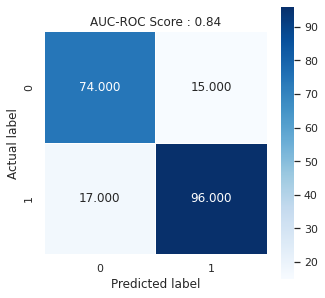

*************************
Validation Set Performance
*************************
Accuracy of KNN : 0.81
ROC AUC Score of KNN : 0.81
Confusion Matrix of KNN : 


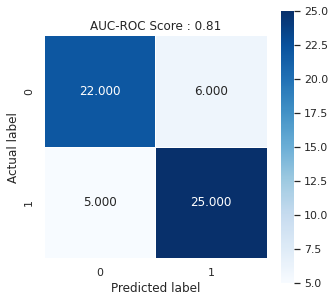

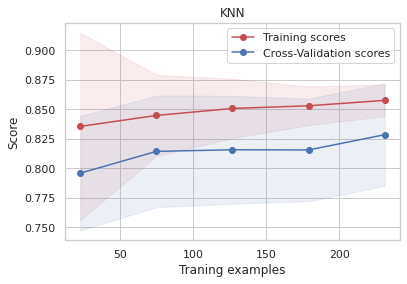

In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=7)

ml_model(knn,"KNN",x_train=x_train,y_train=y_train,
         x_valid=x_valid,y_valid=y_valid,x_test=None)

print("\n")
generate_learning_curve(
    model=knn,
    model_name="KNN",
    X=input_data,
    y=target,
    ylim=(0.7,1.01),
    epochs=5
)

Hyper-parameter tuning

In [57]:
def KNNGridSearch(X,y,param_limits):
  param_grid={
      "n_neighbors":param_limits[0],
      'algorithm':param_limits[1],
      "leaf_size":param_limits[2]
  }

  knn=GridSearchCV(estimator=KNeighborsClassifier(),
                   param_grid=param_grid,
                   cv=10)
  
  knn.fit(X,y)
  print("Best SVM Hyper-parameters are : ")
  print(knn.best_params_)

  return knn.best_params_["n_neighbors"],knn.best_params_['algorithm'],knn.best_params_["leaf_size"]

In [58]:
n_neighbors=list(range(1,20))
algorithm=["auto","ball_tree","kd_tree","brute"]
leaf_size=list(range(5,50,5))

best_n_neighbors,best_algorithm,best_leaf_size=KNNGridSearch(x_train,y_train.values.ravel(),(n_neighbors,algorithm,leaf_size))


Best SVM Hyper-parameters are : 
{'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 12}


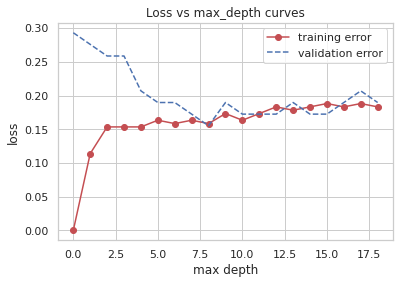

In [60]:
train=[]
valid=[]

for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=  i, algorithm = best_algorithm, 
                             leaf_size= best_leaf_size)
    knn.fit(x_train,y_train.values.ravel())
    train.append(1-accuracy_score(knn.predict(x_train),y_train.values.ravel()))
    valid.append(1-accuracy_score(knn.predict(x_valid),y_valid.values.ravel()))

plt.title("Loss vs max_depth curves")
num_estimators=list(range(len(train)))
plt.plot(num_estimators,train,"o-",color='r',label="training error")
plt.plot(num_estimators,valid,"--",color='b',label="validation error")
plt.xlabel("max depth")
plt.ylabel('loss')
plt.legend()
plt.show()

*************************
Training Set Performance:
*************************
Accuracy of KNN : 0.83
ROC AUC Score of KNN : 0.82
Confusion Matrix of KNN : 


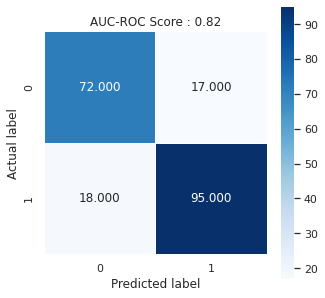

*************************
Validation Set Performance
*************************
Accuracy of KNN : 0.83
ROC AUC Score of KNN : 0.83
Confusion Matrix of KNN : 


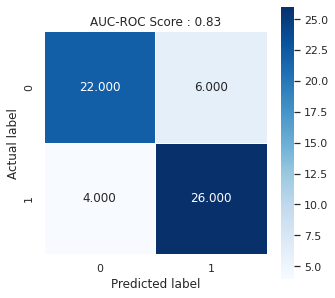

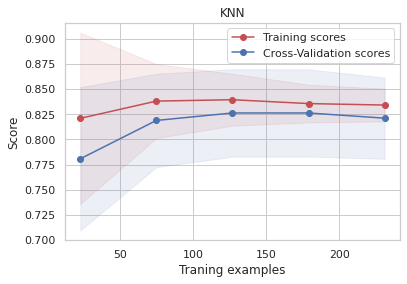

In [61]:
tunedKNN=KNeighborsClassifier(n_neighbors=  best_n_neighbors, algorithm = best_algorithm, 
                             leaf_size= best_leaf_size)

ml_model(tunedKNN,"KNN",x_train=x_train,y_train=y_train,
         x_valid=x_valid,y_valid=y_valid,x_test=None)

print("\n")
generate_learning_curve(
    model=tunedKNN,
    model_name="KNN",
    X=input_data,
    y=target,
    ylim=(0.7,1.01),
    epochs=5
)

###Model Performance On Test Data



For the tuned Decision Tree model 

*************************
Test Set Performance
*************************
Accuracy of Decision Tree : 0.79
ROC AUC Score of Decision Tree : 0.81
Confusion Matrix of Decision Tree : 


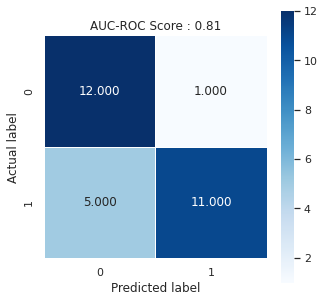

For the tuned Neural Network model 

*************************
Test Set Performance
*************************
Accuracy of DNeural Network : 0.86
ROC AUC Score of DNeural Network : 0.88
Confusion Matrix of DNeural Network : 


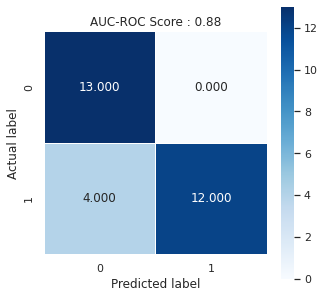

For the tuned ADB model 

*************************
Test Set Performance
*************************
Accuracy of ADB : 0.93
ROC AUC Score of ADB : 0.94
Confusion Matrix of ADB : 


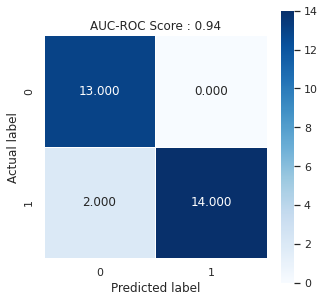

For the tuned SVM model 

*************************
Test Set Performance
*************************
Accuracy of SVM : 0.93
ROC AUC Score of SVM : 0.93
Confusion Matrix of SVM : 


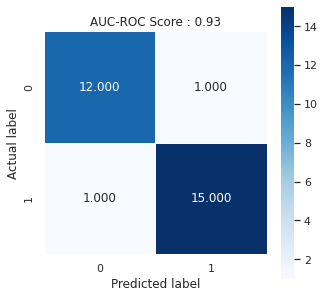

For the tuned KNN model 

*************************
Test Set Performance
*************************
Accuracy of KNN : 0.90
ROC AUC Score of KNN : 0.91
Confusion Matrix of KNN : 


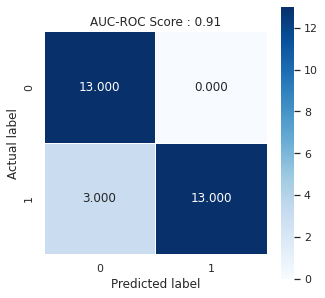

In [87]:
from joblib import dump
print("For the tuned Decision Tree model \n")
ml_model(tunedDTC,"Decision Tree",x_train=None,x_valid=None,x_test=x_test,y_test=y_test.values.ravel())

print("For the tuned Neural Network model \n")
ml_model(tunedNN,"DNeural Network",x_train=None,x_valid=None,x_test=x_test,y_test=y_test.values.ravel())

print("For the tuned ADB model \n")
ml_model(tunedADB,"ADB",x_train=None,x_valid=None,x_test=x_test,y_test=y_test.values.ravel())

print("For the tuned SVM model \n")
ml_model(tunedSVM,"SVM",x_train=None,x_valid=None,x_test=x_test,y_test=y_test.values.ravel())

print("For the tuned KNN model \n")
ml_model(tunedKNN,"KNN",x_train=None,x_valid=None,x_test=x_test,y_test=y_test.values.ravel())